## Simple pendulum - The Lagrangian approach : 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import sympy as smp
from scipy.integrate import odeint

In [2]:
t, g, l, m = smp.symbols('t, g, l, m')

In [5]:
the = smp.symbols(r'\theta', cls = smp.Function)

In [6]:
the = the(t)
the_d = smp.diff(the, t)
the_dd = smp.diff(the_d, t)

In [8]:
x , y = l*smp.sin(the) , -l*smp.cos(the)

In [10]:
T = smp.Rational(1, 2) * m * (smp.diff(x, t)**2+smp.diff(y, t)**2)

In [13]:
V = m*g*y

In [14]:
L = T - V 

In [15]:
L.simplify()

l*m*(2*g*cos(\theta(t)) + l*Derivative(\theta(t), t)**2)/2

In [16]:
EL = smp.diff(L, the) - smp.diff( smp.diff(L, the_d) ,t)

In [18]:
EL.simplify()

-l*m*(g*sin(\theta(t)) + l*Derivative(\theta(t), (t, 2)))

In [21]:
Eq = smp.solve(EL, the_dd)

In [22]:
Eq

[-g*sin(\theta(t))/l]

In [28]:
dzdt = smp.lambdify((g, l, t, the), Eq)
dthedt = smp.lambdify(the_d, the_d) 

In [29]:
def dSdt(S, t, g, l):
    the , z = S
    return[dthedt(z), 
    dzdt(t, g, l, the)[0]]

In [32]:
dSdt((3, 4), 8, 9.81, 4)

[4, -0.11508257538011597]

In [62]:
t = np.linspace(0, 40, 1001)
g = 9.81
l = 4
the0 = np.pi/4
z0 = 0
S0 = (the0, z0) 

In [73]:
sols = odeint(dSdt, t=t, y0=(2,0), args=(g, l))

In [74]:
the = sols.T[0]
the_d = sols.T[1]

In [75]:
x, y = l*np.sin(the) , -l*np.cos(the)

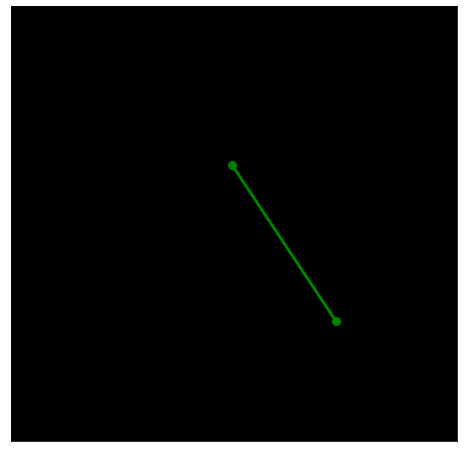

In [78]:
from matplotlib import animation
from matplotlib.animation import PillowWriter
from IPython.display import HTML

def animate(i):
    line.set_data([0, x[i]], [0, y[i]])
    
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_facecolor('k')
ax.get_xaxis().set_ticks([]) 
ax.get_yaxis().set_ticks([])  
line, = plt.plot([], [], 'go-', lw=3, markersize=8)
ax.set_xlim([-1.5+x.min(), x.max()+1.5])
ax.set_ylim([-1.5+y.min(), y.max()+1.5])
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('pendulum_yt.gif',writer='pillow',fps=25)
HTML(ani.to_html5_video())